Each task that is proposed to be completed as part of the homework has a declared "price" in points. The maximum possible amount is 10 points, and together with bonus assignments - 12 points. It is not necessary to complete all the tasks, only a part can be done. Most of the points expect you to write working Python code; sometimes you will need to write comments - for example, to compare several approaches to solve the same problem. Also you can add more cells for your convenience if you need.

This homework focuses on clustering. We will work with images of handwritten digits, learn how to cluster them using two different methods (hierarchical clustering and the 𝐾-means algorithm), evaluate the quality of the partition and choose the optimal number of clusters, as well as visualize intermediate results.

## 1. Loading data
The data we will be working with is available in the scikit-learn library (`sklearn` module) in the `datasets` submodule via the `load_digits` function. The data contains 1,797 observations, each of which is 8×8 pixel image of a handwritten digit from 0 to 9. This is about the same amount of each digit (about 180).

For convenience, every image expands to a 64 (8×8) row, so entire numpy array is 1797×64. The color intensity in each pixel is encoded with an integer from 0 to 16.

In addition to images, their labels are also known. In this task, we will assume that the labels (as well as their amount) are unknown and try to group the data in such a way that the resulting clusters 'better match' the original ones. Possible options for determining the 'better match' are presented later.

**(0.25 points)** Load the images into `X` variable, and their labels into `y` variable.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import manifold, datasets
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from sklearn.decomposition import TruncatedSVD

import pandas as pd

In [2]:
digits = load_digits()
# Number of images
n_samples = len(digits.images)

X = digits.images.reshape((n_samples, -1))

# Getting the already known targets for each image
y = digits.target

In [3]:
X.shape

(1797, 64)

In [4]:
y.shape

(1797,)

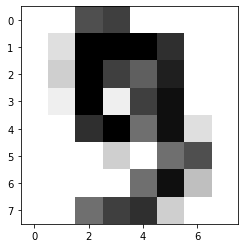

In [5]:
# let's look at digit "9"
plt.imshow(digits.images[9], cmap=plt.cm.gray_r,interpolation='nearest')

In [6]:
assert X.shape == (1797, 64)
assert y.shape == (1797,)

**(0.5 points)** Visualize the first 10 images.

- Arrange images on a grid rather than in a row. You may need the `subplot` and `imshow` functions from the `pyplot` module in the `matplotlib` library.
- You will also need to reshape the images to 8×8.
- Remove ticks and labels from both axes. The `xticks` and `yticks` functions or the `tick_params` function from `pyplot` can help you with this.
- Make the output good sized with the `figure` function from `pyplot`.

#### Let's do all the tasks and additionaly try to use kNN classifier for prediction

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
# Print confusion matrix
confusion_matrix(y_test, predicted)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]], dtype=int64)

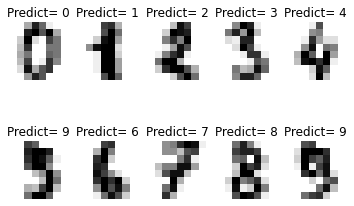

In [8]:
# Zip image with prediction
image_with_prediction = list(zip(digits.images, clf.predict(X)))

# for first 10 images
for pos, (image, prediction) in enumerate(image_with_prediction[:10]):
    plt.subplot(2, 5, pos+1)              # Create 2x5 grid
    plt.axis('off')                       # no axis
    plt.imshow(image, cmap=plt.cm.gray_r) # show image in  gray scale and reverce it
    plt.title("Predict= %i" % prediction) # set title to predicted value
plt.show()

### Conclusion
As we can see, our prediction is not very good. We have the wrong predicted digit "5".

## 2. Clustering and quality evaluation

**(2 points)** Implement the the KMeans algorithm. Use objective function $L = \sum_{i=1}^{n}|x_{i}-Z_{A(x_{i})}|^{2}$, where $Z_{A(x_{i})}$ is the center of the cluster corresponding to $x_{i}$ object.

In [9]:
from sklearn.exceptions import NotFittedError
from numpy.random import RandomState

In [ ]:
class CustomKMeans:
    def __init__(self, n_clusters=2, max_iter=30, n_init=10, random_state=42):
        '''K-Means clustering.
        
        Args:
            n_clusters: int, default=2
                The number of clusters to be formed is also 
                the number of centroids to generate. 
            max_iter: int, default=300
                Maximum number of iterations of the k-means algorithm for a
                single run.
            n_init: int, default=10
                Number of time the k-means algorithm will be run with different
                centroid seeds. The final results will be the best output of
                n_init consecutive runs in terms of objective function.
            random_state: int, default=42
                Random state.
        '''
        self.n_clusters = n_clusters
        self.n_init = 10
        self.max_iter = 300
        self.random_state = RandomState(seed=random_state)
        
    def calculate_distances_to_centroids(self, X, cluster_centers):
        """
        Returns (n, c) matrix where the element at position (i, j) 
        is the distance from i-th object to j-th centroid."""
        # <your code>
        return np.linalg.norm(X - cluster_centers[0,:],axis=1).reshape(-1,1)
    
    def update_centroids(self, X, nearest_clusters):
        """
        Returns numpy array of shape (n_clusters, n_features) - 
        new clusters that are found by averaging objects belonging 
        to the corresponding cluster."""
        # <your code>
        pass
        
    def fit(self, X):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        """
        assert X.shape[0] >= self.n_clusters
        # <your code>
        
        return self
            
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted cluster labels.
        """
        if hasattr(self, 'cluster_centers_'):
            # <your code>
            pass
        else: 
            raise NotFittedError("CustomKMeans instance is not fitted yet")

**(1 points)** Get the `X` array partition into 10 clusters. Visualize the centers of clusters.
- We will assume that the center of the cluster is average value of all observations belonging to the cluster.
- The cluster centers should have the same shape as our observations (64). So you have to average the points across the rows.

In [10]:
kmeans = KMeans(init="random", n_clusters=10, n_init=500)
kmeans.fit(X)
kmeans_preds = kmeans.predict(X)

In [11]:
def visualize_numbers(numbers):
    fig, axes = plt.subplots(nrows=3, ncols=4)
    fig.tight_layout()
    for pos, image in enumerate(numbers):
        axes[int(pos / 4)][pos % 4].imshow(image, cmap=plt.cm.gray_r) # show image in  gray scale and reverce it
        axes[int(pos / 4)][pos % 4].axis('off')
        axes[int(pos / 4)][pos % 4].set_title(f"Center #{pos}")       # set title to predicted value
    axes[2][2].axis('off')
    axes[2][3].axis('off')
    plt.show() 

In [12]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[kmeans_preds == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

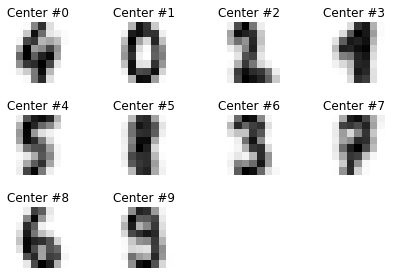

In [13]:
visualize_numbers(cluster_centers)

In [14]:
custor_kmeans_labels = kmeans_preds

In [15]:
assert custor_kmeans_labels.shape == (1797,)

**(0.5 points)** Experiment with `max_iter` and `n_init` parameters. Look at the range of values of the objective function, it's best values, at what parameters and how often they are achieved.

#### max_iter

In [67]:
scores = []

ks = list(range(50, 550, 50))

for k in tqdm(ks):
    kmeans = KMeans(max_iter = k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    scores.append(metrics.silhouette_score(X, preds))
index_max = np.argmax(scores)
score_max = np.max(scores)
print('v_measure_score (Value max) = ', score_max)
print('max_iter(Silhouette max) = ', ks[index_max])


  0%|          | 0/10 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.17882950345782625
max_iter(Silhouette max) =  50


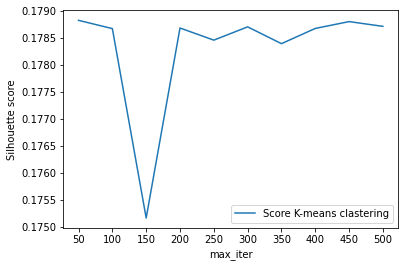

In [68]:
plt.plot(ks, scores)
#plt.plot(ks, n_init)
plt.xticks(ks)
plt.xlabel('max_iter')
plt.ylabel('Silhouette score')
plt.legend(["Score K-means clastering", "Score Agglomerative Clustering"], loc ="lower right")
plt.show()

### n_init

In [69]:
scores = []

ks1 = list(range(2, 22, 2))

for k in tqdm(ks1):
    kmeans = KMeans(max_iter = ks[index_max], n_init=k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    scores.append(metrics.silhouette_score(X, preds))
n_init = np.argmax(scores)
score_max = np.max(scores)
print('Silhouette_score (Value max) = ', score_max)
print('n_init(Silhouette max) = ', ks1[n_init])

  0%|          | 0/10 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.17877805923183712
n_init(Silhouette max) =  18


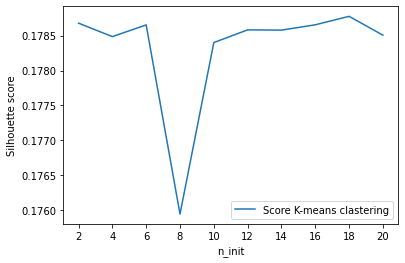

In [70]:
plt.plot(ks1, scores)
#plt.plot(ks, n_init)
plt.xticks(ks1)
plt.xlabel('n_init')
plt.ylabel('Silhouette score')
plt.legend(["Score K-means clastering", "Score Agglomerative Clustering"], loc ="lower right")
plt.show()

In [82]:
print('   The BEST parameters are:')
print('   index_max        = ', ks[index_max])
print('   n_init           = ', ks1[n_init])
print('   Silhouette score = ', score_max)

   The BEST parameters are:
   index_max        =  50
   n_init           =  18
   Silhouette score =  0.17877805923183712


#### Conclusion
- we found best "index_max" in the range of values of the objective function - max Silhouette_score, fix it and then found best "n_init" in the the same the objective function

Now we will use two popular algorithms: hierarchical clustering and $K$-means clustering. These and other algorithms are available in the `scikit-learn` module in the `cluster` submodule. Hierarchical clustering is called `AgglomerativeClustering`, and the $K$-means method is called `KMeans`.

**(0.5 points)** Use each of the two methods: hierarchical clustering and KMeans. Get the `X` array partition into 10 clusters.

- Note that `AgglomerativeClustering` does not have a `predict` method, so you can either use the `fit_predict` method or use the `fit` method and then look at the `labels_` attribute of the class instance.
- Kmeans performs multiple runs (default 10) with random centers and then returns the best partition in terms of average distance within the clusters. You can increase the number of runs to improve the quality of predictions in the `i_init` parameter.

In [71]:
aggl = AgglomerativeClustering(linkage = 'average', n_clusters=10)
aggl_preds = aggl.fit_predict(X)

In [72]:
aggl_preds.shape

(1797,)

In [73]:
kmeans = KMeans(init="random", n_clusters=10, n_init=500)
kmeans.fit(X)
kmeans_preds = kmeans.predict(X)

In [74]:
kmeans_preds.shape

(1797,)

In [75]:
hierarchical_labels = aggl_preds
kmeans_labels = kmeans_preds

In [76]:
assert hierarchical_labels.shape == (1797,)
assert kmeans_labels.shape == (1797,)

**(0.5 points)** Visualize the centers of clusters obtained by both methods.

#### AgglomerativeClustering

In [83]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[aggl_preds == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

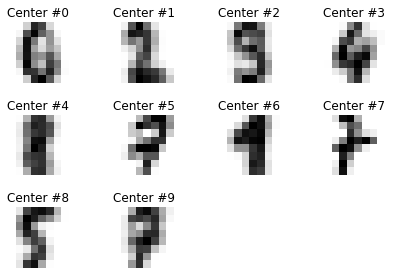

In [84]:
visualize_numbers(cluster_centers)

#### K-means

In [85]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[kmeans_preds == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

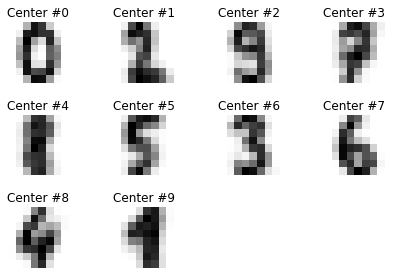

In [86]:
visualize_numbers(cluster_centers)

### Conclusion
- the centers of clusters visualized better K-means then AgglomerativeClustering

In a situation where the true number of classes is unknown, we can select it by maximazing some metric.

When we can set some distance function between our observations, we can consider the `silhouette` distance as a function of measuring the quality of the clustering. Let's show how it is calculated:

Let $X$ – set of observations, $M \subset X$ – one of the clusters obtained as a result of clustering process, $\rho$ – some metric on $X$. Let's choose one observation $x \in M$. Denote $a(x)$ as the average distance from $x$ to  $x'$ points from the same cluster:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Denote $b(x)$ as minimun of average distances from $x$ to $x''$ from some other cluster $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

The silhouette is difference between a(x) and b(x), normalized to $[-1, \, 1]$ and averaged over all observations:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

The implementation of this metric in the `scikit-learn` is the `silhouette_score` function from the `metrics` submidule.

**(1 point)** For each $K$ between 2 and 20 inclusive, partition of the array $X$ into $K$ clusters using both methods. Calculate the silhouette score and visualize it for both methods on the same plot ($K$ on the $x$ axis and silhouette score on the $y$ axis). Sign the axes and make a legend.

### K-means

In [87]:
scores = []

ks = list(range(2, 21))

for k in tqdm(ks):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    scores.append(metrics.silhouette_score(X, preds))
index_max = np.argmax(scores) + 2
score_max = np.max(scores)
print('v_measure_score (Value max) = ', score_max)
print('# Clasters(Silhouette max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.18910885688390736
# Clasters(Silhouette max) =  9


### AgglomerativeClustering

In [88]:
scores1 = []
ks = list(range(2, 21))

for k in tqdm(ks):
    aggl = AgglomerativeClustering(linkage = 'average', n_clusters = k)
    preds = aggl.fit_predict(X)
    scores1.append(metrics.silhouette_score(X, preds))
index_max = np.argmax(scores1) + 2
score_max = np.max(scores1)
print('v_measure_score (Value max) = ', score_max)
print('# Clasters(Silhouette max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.16720120688950307
# Clasters(Silhouette max) =  16


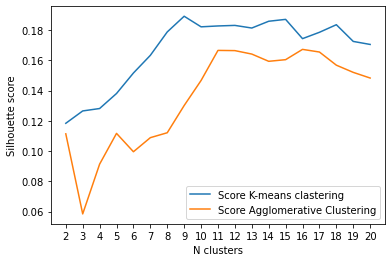

In [89]:
plt.plot(ks, scores)
plt.plot(ks, scores1)
plt.xticks(ks)
plt.xlabel('N clusters')
plt.ylabel('Silhouette score')
plt.legend(["Score K-means clastering", "Score Agglomerative Clustering"], loc ="lower right")
plt.show()

### Сonclusion
- For K-means: # Clasters(Silhouette max) =  9, Silhouette score (Value max) =  0.189
- For AgglomerativeClustering: # Clasters(Silhouette max) =  16, Silhouette score (Value max) =  0.167
- K-means clastering has better Silhouette score then Agglomerative clustering

When we know the true clustering labels, the clustering result can be compared to them using measures such as `homogeneity`, `completeness` and their harmonic mean - $V$-score. The definitions of these quantities are rather bulky and are based on the [entropy of the probability distribution](https://ru.wikipedia.org/wiki/Информационная_энтропия). Details are given in [this article](http://aclweb.org/anthology/D/D07/D07-1043.pdf). In practice, it's enough to know that `homogeneity`, `completeness` and $V$-score are in the range from 0 and 1, and the more, the better.

Since we know what digit each image is (`y` array), we can compare the clustering results to it using the measures listed above.

**(0.5 points)** Repeat the previous task using $V$-measure instead of silhouette.

### K-means

In [90]:
scores2 = []
ks = list(range(2, 21))

for k in tqdm(ks):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    preds = kmeans.predict(X)
    scores2.append(metrics.v_measure_score(y, preds))
index_max = np.argmax(scores2) + 2
score_max = np.max(scores2)
print('v_measure_score (Value max) = ', score_max)
print('# Clasters(v_measure_score max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.7849118303162785
# Clasters(v_measure_score max) =  14


### AgglomerativeClustering

In [91]:
scores3 = []
ks = list(range(2, 21))

for k in tqdm(ks):
    aggl = AgglomerativeClustering(linkage = 'average', n_clusters = k)
    preds = aggl.fit_predict(X)
    scores3.append(metrics.v_measure_score(y, preds))
index_max = np.argmax(scores3) + 2
score_max = np.max(scores3)
print('v_measure_score (Value max) = ', score_max)
print('# Clasters(v_measure_score max) = ', index_max)

  0%|          | 0/19 [00:00<?, ?it/s]

v_measure_score (Value max) =  0.798891168001257
# Clasters(v_measure_score max) =  20


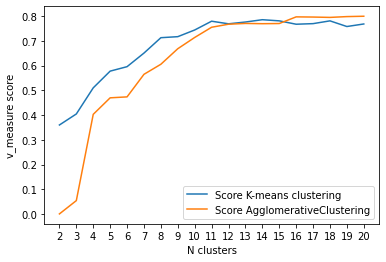

In [92]:
plt.plot(ks, scores2)
plt.plot(ks, scores3)
plt.xticks(ks)
plt.xlabel('N clusters')
plt.ylabel('v_measure score')
plt.legend(["Score K-means clustering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

### Conclusion
- For K-means: # Clasters(v_measure_score max) =  16, v_measure_score (Value max) =  0.786
- For AgglomerativeClustering: # Clasters(v_measure_score max) =  20, v_measure_score (Value max) =  0.799
- Agglomerative clustering clastering has better v_measure score then K-means clastering 

## 3. Feature space dimensionality reduction

In some cases, especially when there are a large number of features, when not all of them are informative, and some of them are correlated, it can be useful to reduce the dimension of the feature space. This mean that instead of $d$ original features, we will go to $d'\ll d$ new ones. And if earlier our data were presented in the form of an $n×d$ matrix, then it will presented as a $n×d'$.

There are two popular dimensionality reduction approaches:
- select new features from existing features;
- extract the new features by transforming old ones, for example, by making $d'$ different linear combinations of columns of an $n×d$ matrix.

One widely used dimensionality reduction technique is the Singular Value Decomposition (SVD). This method allows you to construct any number $d'\leq d$ of new features in such a way that they are the most informative (in some sense).

The `scikit-learn` module has several implementations of singular value decomposition. We will use the `TruncatedSVD` class from the `decomposition` submodule.

**Note:** The singular value decomposition of the matrix $M$ is usually written as $M=U \Sigma V^{*}$. `TruncatedSVD`, in turn, returns only the $d'$ first columns of the matrix $U$.

**(1 point)** Perform a singular value decomposition of the $X$ matrix, leaving 2, 5, 10, 20 features. In each case, perform hierarchical clustering and $K$-Means clustering (take the number of clusters equal to 10). Calculate the silhouette and $V$-score and compare them to corresponding values obtained from the original data.

**Note**: It is not valid to compare the silhouette calculated with different metrics. Even if we use the same metric function when calculating the distance between points in the data, after applying dimensionality reduction or other data transformations, we will (not always) get different silhouette scores. Therefore, after training the clustering algorithm, to compare the result of clustering, you need to calculate the silhouette on the original data.

### K-means

In [93]:
f_num = [2, 5, 10, 20] # features numbers

In [94]:
scores4, scores5 = [], []

for k in tqdm(f_num):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(X_svd)
    preds = kmeans.predict(X_svd)
    scores4.append(metrics.silhouette_score(X, preds))
    scores5.append(metrics.v_measure_score(y, preds))

print('Silhouette (Value max) = ', np.max(scores4))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores4)])
print('v_measure_score (Value max) = ', np.max(scores5))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores5)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.18185116640187718
Features numbers - d'(Silhouette max) =  20
v_measure_score (Value max) =  0.7345247823945171
Features numbers - d'(v_measure_score max) =  20


### AgglomerativeClustering

In [95]:
scores6, scores7 = [], []

for k in tqdm(f_num):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X)
    aggl = AgglomerativeClustering(n_clusters = 10)
    preds = aggl.fit_predict(X_svd)
    scores6.append(metrics.silhouette_score(X, preds))
    scores7.append(metrics.v_measure_score(y, preds))

print('Silhouette (Value max) = ', np.max(scores6))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores6)])
print('v_measure_score (Value max) = ', np.max(scores7))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores7)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.1765881132796084
Features numbers - d'(Silhouette max) =  10
v_measure_score (Value max) =  0.8259753348813222
Features numbers - d'(v_measure_score max) =  10


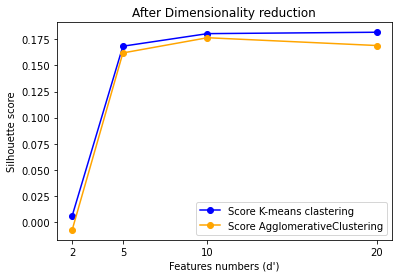

In [96]:
plt.plot(f_num, scores4, '-ok', color='blue')
plt.plot(f_num, scores6, '-ok', color='orange')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('Silhouette score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

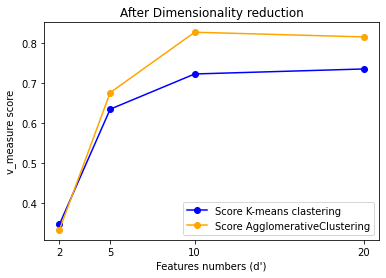

In [97]:
plt.plot(f_num, scores5, '-ok', color='blue')
plt.plot(f_num, scores7, '-ok', color='orange')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('v_measure score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

### Conclusion
  - with the Clusters number = 10 and  Features numbers reducing up to d' = 10, AgglomerativeClustering  increase v_measure_score  up to  0.826 !!!



Another popular dimensionality reduction approach that is useful for working with images is t-distributed stochastic neighbor embeddings, abbreviated `tSNE`. Unlike singular value decomposition, this it is non-linear transformation. It's main idea is to map points from a space of dimension `d` to another space of dimension 2 or 3 in such a way that the distances between points are mostly preserved. Mathematical details can be found, for example, [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

The implementation of `tSNE` in the `scikit-learn` library is the `TSNE` class in the `manifold` submodule.

**Note:** In recent years [UMAP](https://github.com/lmcinnes/umap) is often used istead of `tSNE`. It is a faster algorithm with similar properties. We don't ask you to use `UMAP` because it requires you to install another dependency, the `umap-learn` library. Those who wish can perform the following task using `UMAP`.

**(0.5 points)** Perform a tSNE-transform of the `X` matrix, leaving 2 features. Visualize the obtained data in the form of a scatter plot form: the first feature on the horizontal axis, and the second one the vertical axis. Color the points according to the digits they belong to.

- The `c` parameter in the plt.scatter function is responsible for the color of the points. Pass the true labels to it.

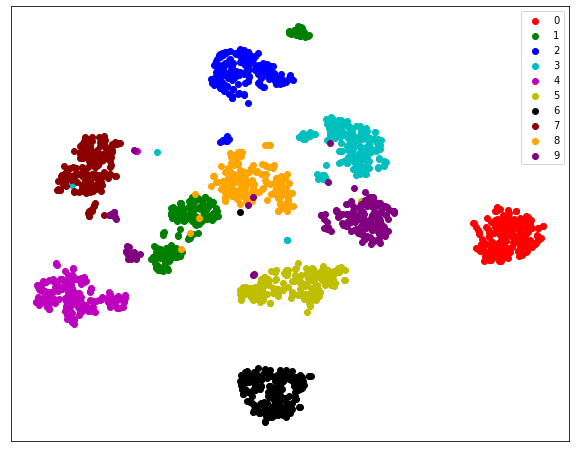

In [98]:
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X)

target_ids = range(len(digits.target_names))

plt.figure(figsize=(10, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'darkred', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.xticks(())
plt.yticks(())
plt.show()

### Conclusion
- during visualization the obtained data in the form of a scatter plot we see, that some digits has intersection with other digits

**(0.5 points)** From the data transformed using the tSNE, perform hierarchical clustering and $K$-means clustering (take the number of clusters equal to 10). Calculate the silhouette and the $V$-score and compare them to corresponding values obtained from the original data.

### K-means

In [99]:
scores8_original, scores9_original = [], []
scores8, scores9 = [], []

kmeans_origanal = KMeans(n_clusters = 10, random_state=42)
kmeans = KMeans(n_clusters = 10, random_state=42)

kmeans_origanal.fit(X)
kmeans.fit(X_2d)

preds_best_original_k = kmeans_origanal.predict(X)
preds_best_k = kmeans.predict(X_2d)

scores8_original.append(metrics.silhouette_score(X, preds_best_original_k))
scores9_original.append(metrics.v_measure_score(y, preds_best_original_k))

scores8.append(metrics.silhouette_score(X, preds_best_k))
scores9.append(metrics.v_measure_score(y, preds_best_k))

print('Silhouette (Original) = ', np.max(scores8_original))
print('Silhouette (    TSNE) = ', np.max(scores8))
print('Features numbers(Original) = ', np.shape(X)[1])
print('Features numbers(    TSNE) = ', np.shape(X_2d)[1])
print('-------------------------------')
print('v_measure_score (Original) = ', np.max(scores9_original))
print('v_measure_score (    TSNE) = ', np.max(scores9))
print('Features numbers(Original) = ', np.shape(X)[1])
print('Features numbers (   TSNE) = ', np.shape(X_2d)[1])

Silhouette (Original) =  0.18244258012780126
Silhouette (    TSNE) =  0.16347034069873623
Features numbers(Original) =  64
Features numbers(    TSNE) =  2
-------------------------------
v_measure_score (Original) =  0.7414681265635256
v_measure_score (    TSNE) =  0.9137798316714034
Features numbers(Original) =  64
Features numbers (   TSNE) =  2


### AgglomerativeClustering

In [100]:
scores10_original, scores11_original = [], []
scores10, scores11 = [], []

aggl_original = AgglomerativeClustering(n_clusters = 10)
aggl = AgglomerativeClustering(n_clusters = 10)

preds_original = aggl.fit_predict(X)
preds = aggl.fit_predict(X_2d)

scores10_original.append(metrics.silhouette_score(X, preds_original))
scores11_original.append(metrics.v_measure_score(y, preds_original))

scores10.append(metrics.silhouette_score(X, preds))
scores11.append(metrics.v_measure_score(y, preds))

print('Silhouette (Original) = ', np.max(scores10_original))
print('Silhouette (    TSNE) = ', np.max(scores10))
print('Features numbers(Original) = ', np.shape(X)[1])
print('Features numbers(    TSNE) = ', np.shape(X_2d)[1])
print('-------------------------------')
print('v_measure_score (Original) = ', np.max(scores11_original))
print('v_measure_score (    TSNE) = ', np.max(scores11))
print('Features numbers(Original) = ', np.shape(X)[1])
print('Features numbers (   TSNE) = ', np.shape(X_2d)[1])

Silhouette (Original) =  0.17849659940596496
Silhouette (    TSNE) =  0.1641788047760139
Features numbers(Original) =  64
Features numbers(    TSNE) =  2
-------------------------------
v_measure_score (Original) =  0.8681701126909083
v_measure_score (    TSNE) =  0.9111471953871231
Features numbers(Original) =  64
Features numbers (   TSNE) =  2


### Conclusion:
  After performing the tSNE-transformation of the matrix X (we left 2 features) - our v_measure_score  has increased:
- for K-means clastering       - v_measure_score = from 0.741 to 0.914
- for AgglomerativeClustering  - v_measure_score = from 0.868 to 0.911

**(0.25 points)** Choose the best partition (in terms of silhouette or $V$-score) and visualize the centers of clusters with images. Did you managed to make each digit correspond to one center of the cluster?

In [101]:
cluster_centers = []

for cluster_id in range(10):
    cluster_obj = X[preds_best_k == cluster_id]
    cluster_centers.append(np.mean(cluster_obj, axis=0).reshape(8, 8))

In [103]:
print('v_measure_score (    TSNE) = ', np.max(scores9))
print('Features numbers (   TSNE) = ', np.shape(X_2d)[1])

v_measure_score (    TSNE) =  0.9137798316714034
Features numbers (   TSNE) =  2


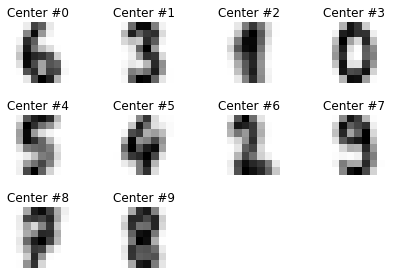

In [102]:
visualize_numbers(cluster_centers)

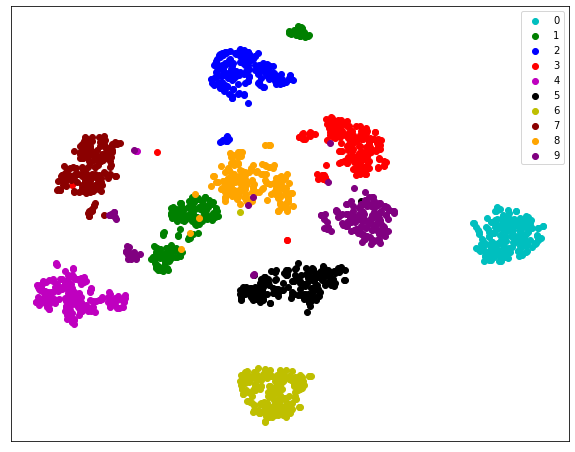

In [106]:
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X)

target_ids = range(len(digits.target_names))

plt.figure(figsize=(10, 8))
colors = 'c', 'g', 'b', 'r', 'm', 'k', 'y', 'darkred', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.xticks(())
plt.yticks(())
plt.show()

### Conclusion
- we we couldn't manage to make each digit correspond to one center of the cluster

## 4. Results and bonus part

Write in free form what conclusions you made after completing this assignment. Answer the following questions:

**(0.5 points)** Which algorithm gives more meaningful results - hierarchical clustering or $K$- means clustering. Does it depend on the algorithm settings or on the quality evaluation method?

- more meaningful results - gives us 𝐾 - means clustering
- The choice of clustering algorithm and algorithm settings have a direct impact on the quality of the clustering result, and quality evaluation methods allow us to choose the right clustering algorithm and choose the right combination of algorithm settings.

**(0.5 points)** Imagine the situation where after hierarchical clustering, you need to cluster new data in the same way without retraining the model. Suggest a method how you will do it and how you will measure the quality of clustering of new data.

- centering, normalization and standardization of new data in accordance with the procedures available within the clustering algorithm used.
- reduction of new data to the dimension of clustered data
- combining new data with clustered data

**(0.5 points)** Does dimensionality reduction improve clustering results?

- Data dimension reduction can improve the result of clustering when when we perform a combinatorial combination of collinear features that do not affect the change in the geometry of the data
- While reducing the dimensionality of the data, we preserve their information content or the geometry of the original data as much as possible, we can improve the clustering results.

**(0.5)** How to evaluate the quality of dimensional reducrion? Suggest at least 2 options.

- Quality assessment measures during dimentional reduction often base on calculating the preservation of geometry of data. Some options of Quality assessment measures, based on this methodology, are presented below.

1) Normalization independent embedding quality assessment (NIEQA)    
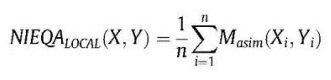
2) The Relative Error
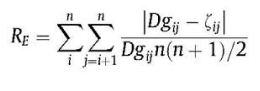
3) Co-ranking Matrix (Q)
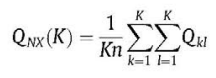
4) Global Measure (Qy)


**(Bonus 2 points)** Load the [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist) dataset. You can also do it with `scikit-learn` as explained [here](https://stackoverflow.com/a/60450028). Explore the data and try to cluster it using different approaches. Compare results of these approaches using the silhouette and the $V$-score.

In [107]:
from scipy.io import loadmat
mnist = loadmat("data/mnist-original.mat")
X = mnist["data"].T
y = mnist["label"][0]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [111]:
X_train.shape

(52500, 784)

In [112]:
y_train.shape

(52500,)

#### Let's try to use the best algoritm TSNE

In [113]:
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X_train)

In [114]:
X_2d.shape

(52500, 2)

#### K-means

In [115]:
scores12, scores13 = [], []

kmeans = KMeans(n_clusters = 10, random_state=42)
kmeans.fit(X_2d)
preds_best = kmeans.predict(X_2d)
scores12.append(metrics.silhouette_score(X_train, preds_best))
scores13.append(metrics.v_measure_score(y_train, preds_best))

print('Silhouette (TSNE) = ', np.max(scores12))
print('Features numbers = ', f_num[np.argmax(scores12)])
print('v_measure_score (TSNE) = ', np.max(scores13))
print('Features numbers = ', f_num[np.argmax(scores13)])

Silhouette (TSNE) =  0.03398310190019706
Features numbers =  2
v_measure_score (TSNE) =  0.7850437123524288
Features numbers =  2


#### SVD

In [116]:
scores14, scores15 = [], []

for k in tqdm(f_num):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X_train)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(X_svd)
    preds = kmeans.predict(X_svd)
    scores14.append(metrics.silhouette_score(X_train, preds))
    scores15.append(metrics.v_measure_score(y_train, preds))

print('Silhouette (Value max) = ', np.max(scores14))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores14)])
print('v_measure_score (Value max) = ', np.max(scores15))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores15)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.05948999563473975
Features numbers - d'(Silhouette max) =  10
v_measure_score (Value max) =  0.48919966385814345
Features numbers - d'(v_measure_score max) =  20


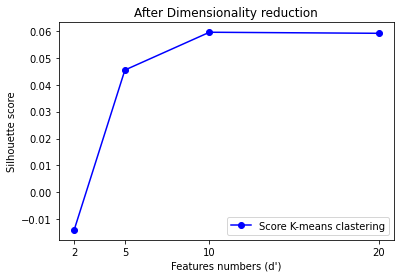

In [117]:
plt.plot(f_num, scores14, '-ok', color='blue')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('Silhouette score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

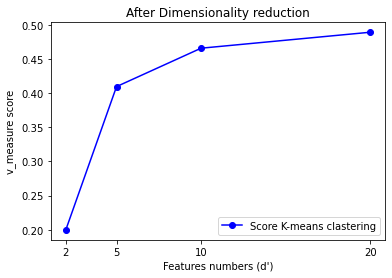

In [118]:
plt.plot(f_num, scores15, '-ok', color='blue')
plt.xticks(f_num)
plt.xlabel('Features numbers (d\')')
plt.ylabel('v_measure score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

In [119]:
scores16, scores17 = [], []
f_num_1 = [30, 50, 70, 100] # features numbers

for k in tqdm(f_num_1):
    svd = TruncatedSVD(n_components=k, random_state=42)
    X_svd = svd.fit_transform(X_train)
    kmeans = KMeans(n_clusters = 10)
    kmeans.fit(X_svd)
    preds = kmeans.predict(X_svd)
    scores16.append(metrics.silhouette_score(X_train, preds))
    scores17.append(metrics.v_measure_score(y_train, preds))

print('Silhouette (Value max) = ', np.max(scores16))
print('Features numbers - d\'(Silhouette max) = ', f_num[np.argmax(scores16)])
print('v_measure_score (Value max) = ', np.max(scores17))
print('Features numbers - d\'(v_measure_score max) = ', f_num[np.argmax(scores17)])

  0%|          | 0/4 [00:00<?, ?it/s]

Silhouette (Value max) =  0.058695538711951566
Features numbers - d'(Silhouette max) =  2
v_measure_score (Value max) =  0.49826868796948504
Features numbers - d'(v_measure_score max) =  5


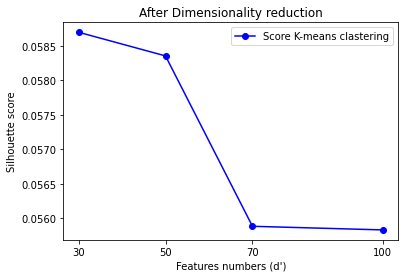

In [120]:
plt.plot(f_num_1, scores16, '-ok', color='blue')
plt.xticks(f_num_1)
plt.xlabel('Features numbers (d\')')
plt.ylabel('Silhouette score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="upper right")
plt.show()

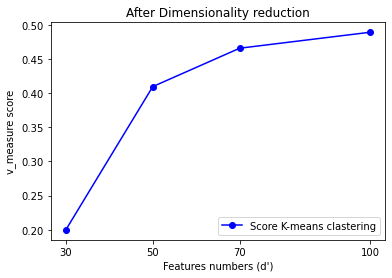

In [121]:
plt.plot(f_num_1, scores15, '-ok', color='blue')
plt.xticks(f_num_1)
plt.xlabel('Features numbers (d\')')
plt.ylabel('v_measure score')
plt.title('After Dimensionality reduction')
plt.legend(["Score K-means clastering", "Score AgglomerativeClustering"], loc ="lower right")
plt.show()

CONCLUSION: We've got the best result when using the TSNE method to reduce the dimension of the feature space to 2. We have received a criterion for assessing the quality of K-means = 0.7850437123524288 for dataset  MNIST Handwritten Digits.